# Import ALL necessary Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np

torch.manual_seed(1)

# Import Training file into a DataFrame

In [2]:
df = pd.read_csv('/content/train_data.csv', header=0)

### Extract Y-Label vocabulary  (Unique words in Target Line)

In [3]:
from itertools import chain

unique_relations = []
for i in range(0,len(df['IOB Slot tags'])):
  unique_relations.append(df['IOB Slot tags'][i].split(' '))

unique_relations = list(set(list(chain.from_iterable( unique_relations ))))
print(unique_relations)
print(len(unique_relations))

['B_char', 'I_country', 'I_genre', 'O', 'B_mpaa_rating', 'B_producer', 'B_genre', 'I_language', 'B_release_year', 'B_director', 'B_location', 'B_subject', 'I_char', 'B_cast', 'I-movie', 'B_person', 'B_language', 'I_producer', 'I_director', 'I_mpaa_rating', 'I_release_year', 'I_movie', 'B_country', 'I_cast', 'I_subject', 'B_movie', 'I_person']
27


### Provide an index to each unique vocab word in Y-Label

In [4]:
vocab2slot = {j:i for i,j in enumerate(unique_relations)}
vocab2slot['PAD'] = 27  # Do !NOT! assign this value randomly. Keep it incremental since we are passing length to model later.
vocab2slot

{'B_cast': 13,
 'B_char': 0,
 'B_country': 22,
 'B_director': 9,
 'B_genre': 6,
 'B_language': 16,
 'B_location': 10,
 'B_movie': 25,
 'B_mpaa_rating': 4,
 'B_person': 15,
 'B_producer': 5,
 'B_release_year': 8,
 'B_subject': 11,
 'I-movie': 14,
 'I_cast': 23,
 'I_char': 12,
 'I_country': 1,
 'I_director': 18,
 'I_genre': 2,
 'I_language': 7,
 'I_movie': 21,
 'I_mpaa_rating': 19,
 'I_person': 26,
 'I_producer': 17,
 'I_release_year': 20,
 'I_subject': 24,
 'O': 3,
 'PAD': 27}

### Split slot tokens and replace the words in the Target (Y) column with the index of unique slots
(Skipping this since we need to encode PAD values as well)

In [ ]:
slots = []

for i in df['IOB Slot tags']:

  slot = [vocab2slot[i.split(' ')[j]] for j in range(0,len(i.split(' ')))]
  slots.append(slot)

print(slots)

### Tokenize and Display Input Sentences (X-Label - Feature)

In [ ]:
sentences = []

for i in df['utterances']:

  sentence = [i.split(' ')[j] for j in range(0,len(i.split(' ')))]
  sentences.append(sentence)

print(sentences)

### Extract X-Label vocabulary (Unique words of feature sentences)

In [7]:
sentence_vocab = list(set(list(chain.from_iterable( sentences ))))
sentence_vocab

['paquin',
 'men',
 "i'm",
 'releases',
 'westerns',
 'revenues',
 'hope',
 'film',
 'return',
 'spilberg',
 'bros',
 'damon',
 'connery',
 'role',
 'films',
 'shown',
 'costs',
 'originally',
 'recently',
 'bay',
 'seventeen',
 'weekend',
 'streisand',
 'regarding',
 'dispaly',
 'matt',
 'patrick',
 'stats',
 'chess',
 'godfather',
 'columbia',
 'south',
 'languages',
 'g',
 'mgm',
 'realese',
 'worldwide',
 'now',
 'watson',
 'set',
 'locate',
 'brad',
 'look',
 'general',
 'chick',
 'twenty',
 'calendar',
 'adults',
 'parent',
 'step',
 'diane',
 'begins',
 's',
 'lead',
 'rock',
 'sales',
 'bala',
 'paramount',
 'clark',
 'actors',
 'movies',
 'hotel',
 "i'd",
 'appeared',
 'oliver',
 'georges',
 'movie',
 'tin',
 'cujo',
 'whom',
 'woods',
 'since',
 'watching',
 'madagascar',
 'les',
 'alan',
 'acted',
 'dreams',
 'uk',
 'restrictions',
 'allen',
 'kati',
 'goodfellas',
 'cuts',
 'cost',
 'release',
 'starring',
 'singer',
 'et',
 'portugese',
 'new',
 'freedom',
 'actress',
 'ju

### Provide a index to each unique vocab word in X-Label

In [8]:
vocab2sent = {j:i for i,j in enumerate(sentence_vocab)}
vocab2sent['PAD'] = 1147 # Do !NOT! assign this value randomly. Keep it incremental since we are passing length to model later.
vocab2sent['UNK'] = 1148
vocab2sent

{'paquin': 0,
 'men': 1,
 "i'm": 2,
 'releases': 3,
 'westerns': 4,
 'revenues': 5,
 'hope': 6,
 'film': 7,
 'return': 8,
 'spilberg': 9,
 'bros': 10,
 'damon': 11,
 'connery': 12,
 'role': 13,
 'films': 14,
 'shown': 15,
 'costs': 16,
 'originally': 17,
 'recently': 18,
 'bay': 19,
 'seventeen': 20,
 'weekend': 21,
 'streisand': 22,
 'regarding': 23,
 'dispaly': 24,
 'matt': 25,
 'patrick': 26,
 'stats': 27,
 'chess': 28,
 'godfather': 29,
 'columbia': 30,
 'south': 31,
 'languages': 32,
 'g': 33,
 'mgm': 34,
 'realese': 35,
 'worldwide': 36,
 'now': 37,
 'watson': 38,
 'set': 39,
 'locate': 40,
 'brad': 41,
 'look': 42,
 'general': 43,
 'chick': 44,
 'twenty': 45,
 'calendar': 46,
 'adults': 47,
 'parent': 48,
 'step': 49,
 'diane': 50,
 'begins': 51,
 's': 52,
 'lead': 53,
 'rock': 54,
 'sales': 55,
 'bala': 56,
 'paramount': 57,
 'clark': 58,
 'actors': 59,
 'movies': 60,
 'hotel': 61,
 "i'd": 62,
 'appeared': 63,
 'oliver': 64,
 'georges': 65,
 'movie': 66,
 'tin': 67,
 'cujo': 68

In [9]:
c = 0
for i in vocab2sent:
  print(c,'--------',i)
  c += 1

0 -------- paquin
1 -------- men
2 -------- i'm
3 -------- releases
4 -------- westerns
5 -------- revenues
6 -------- hope
7 -------- film
8 -------- return
9 -------- spilberg
10 -------- bros
11 -------- damon
12 -------- connery
13 -------- role
14 -------- films
15 -------- shown
16 -------- costs
17 -------- originally
18 -------- recently
19 -------- bay
20 -------- seventeen
21 -------- weekend
22 -------- streisand
23 -------- regarding
24 -------- dispaly
25 -------- matt
26 -------- patrick
27 -------- stats
28 -------- chess
29 -------- godfather
30 -------- columbia
31 -------- south
32 -------- languages
33 -------- g
34 -------- mgm
35 -------- realese
36 -------- worldwide
37 -------- now
38 -------- watson
39 -------- set
40 -------- locate
41 -------- brad
42 -------- look
43 -------- general
44 -------- chick
45 -------- twenty
46 -------- calendar
47 -------- adults
48 -------- parent
49 -------- step
50 -------- diane
51 -------- begins
52 -------- s
53 -------- le

In [10]:
len(vocab2sent)

1149

### Replace the words in the Input Feature (X) column with the index of unique words 
(Skipping this since we need to encode PAD values as well)

In [11]:
# sentences_encoded = []

# for i in df['utterances']:

#   sent_enc = [vocab2sent[i.split(' ')[j]] for j in range(0,len(i.split(' ')))] #Tokenize using proper tokenizer based on use case
#   sentences_encoded.append(sent_enc)

# print(sentences_encoded)

### Basic stats to understand input data

In [ ]:
import statistics

lengths = [len(i) for i in sentences]
print("Length of all input sentences:", lengths)
print("Max length of all sentences",len(max(sentences, key=len)))
print("Median of lengths (to see if padding or truncating required)",statistics.median(lengths))

###Better to visualize the Frequency Distribution

In [13]:
import nltk
from nltk import FreqDist
fd = FreqDist(lengths)

print(fd.keys(), fd.values())

dict_keys([8, 5, 6, 7, 9, 3, 4, 11, 12, 10, 2, 15, 14, 16, 13, 17, 18, 1, 21]) dict_values([225, 334, 356, 311, 158, 224, 339, 60, 44, 94, 55, 8, 16, 4, 17, 2, 1, 4, 1])


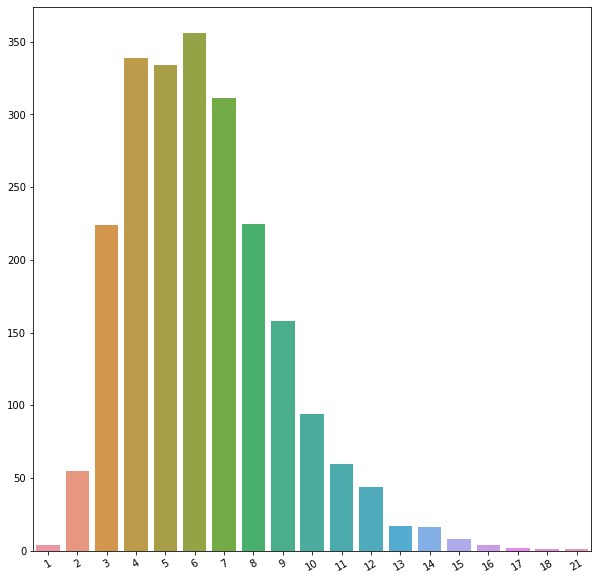

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=list(fd.keys()), y=list(fd.values()), ax=ax)
plt.xticks(rotation=30);

### PAD input sentences to match max length of all sentences (Right padding)

In [15]:
MAX_LEN = len(max(sentences, key=len))

def pad_sequence(sentences,max_len=50):
  for i in range(len(sentences)):
    while len(sentences[i])<max_len:
      sentences[i].append('PAD')

pad_sequence(sentences, max_len=MAX_LEN)

In [ ]:
sentences_encoded = []

for i in sentences:
  sent_enc = [vocab2sent[token] for token in i] #Tokenize using proper tokenizer based on use case
  sentences_encoded.append(sent_enc)

print(sentences_encoded)

In [18]:
len(sentences_encoded)

2253

### PAD target labels to match max length of the Y-column word length (Right padding)

In [19]:
MAX_LEN_SLOT = len(max(slots, key=len))

def pad_sequence(slots,max_len=50):
  for i in range(len(slots)):
    while len(slots[i])<max_len:
      slots[i].append(27) # 27 is value assigned above for PAD

pad_sequence(slots, max_len=MAX_LEN_SLOT)

In [20]:
MAX_LEN_SLOT

21

In [21]:
slots

[[3,
  3,
  0,
  3,
  25,
  21,
  21,
  21,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [3,
  3,
  3,
  25,
  21,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [3,
  3,
  3,
  3,
  3,
  3,
  25,
  21,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [3,
  3,
  0,
  3,
  25,
  21,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [3,
  3,
  3,
  3,
  3,
  3,
  25,
  21,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [3,
  3,
  0,
  3,
  25,
  21,
  21,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [3,
  3,
  3,
  3,
  3,
  25,
  21,
  21,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27,
  27],
 [3, 3, 3, 3, 3, 0, 3, 25, 21, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27],
 [3,
  3,
  3,
  3,
  3,
  25,
  21,
  27,
  27,
  27,
  27,
  

In [22]:
len(slots)

2253

#### TF-IDF (For input sentences) - OPTIONAL

In [23]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# sents = []
# enc = TfidfVectorizer()
# for i in sentences:
#   sents.append(" ".join(i))
# sentences_tfidf = enc.fit_transform(sents)
# print(sentences_tfidf)

In [24]:
# print(enc.get_feature_names())

##### Load TF-IDF values into a DataFrame

In [25]:
# pd.set_option('display.max_colwidth',100)
# df1 = pd.DataFrame(sentences_tfidf.toarray())
# df1.columns = enc.get_feature_names() # Column Names
# df1.index = df['utterances'] # Row Names
# df1

### Model Structure

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [27]:
inputs = [torch.Tensor(sent) for sent in sentences_encoded]
inputs

[tensor([ 958.,  494.,  421.,  253., 1087., 1005.,   90.,    6., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147.,
         1147.]),
 tensor([ 282.,  292.,  904.,  716.,   29., 1147., 1147., 1147., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147.,
         1147.]),
 tensor([ 958.,  193.,  716.,  291.,  435.,  819.,  716.,  332., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147.,
         1147.]),
 tensor([ 958.,  985.,  999.,  253., 1076.,  249., 1147., 1147., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147.,
         1147.]),
 tensor([ 958.,  193.,  716.,  776.,   53.,  819.,  530.,  534., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147., 1147.,
         1147.]),
 tensor([ 958.,  985., 1027.,  819.,  541.,  805., 1023., 1147., 1147., 1147.,
         1147., 1147., 1147., 1147., 1147

In [28]:
lstm = nn.LSTM(21, 21)  # Input dim is 3, output dim is 3
# inputs = [torch.randn(1, 21) for _ in range(21)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (torch.randn(1, 1, 21),
          torch.randn(1, 1, 21))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (torch.randn(1, 1, 21), torch.randn(1, 1, 21))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)

tensor([[[ 0.0000,  0.1767,  0.7616,  ..., -0.0595,  0.0000, -0.7616]],

        [[ 0.0000,  0.8270,  0.7616,  ..., -0.7616,  0.0000, -0.7616]],

        [[ 0.0000,  0.9747,  0.7616,  ..., -0.9640,  0.0000, -0.7616]],

        ...,

        [[ 0.0000,  1.0000,  0.7616,  ...,  0.0000,  0.0000, -0.3807]],

        [[ 0.0000,  1.0000,  0.7616,  ..., -0.7616,  0.0000, -0.7616]],

        [[ 0.0000,  1.0000,  0.7616,  ..., -0.7616,  0.0000, -0.7616]]],
       grad_fn=<StackBackward0>)
(tensor([[[ 0.0000,  1.0000,  0.7616,  0.0000,  0.0000, -0.7616, -0.0000,
           0.0000, -0.0000,  0.7616,  0.0000,  0.0000, -0.9951, -1.0000,
           0.1067,  0.0000,  0.0000,  0.0000, -0.7616,  0.0000, -0.7616]]],
       grad_fn=<StackBackward0>), tensor([[[ 1.2936e+02,  1.8634e+02,  1.0000e+00,  0.0000e+00,  0.0000e+00,
          -1.0000e+00, -2.0000e+00,  1.2075e+02, -3.5618e+02,  1.0000e+00,
           1.0000e+00,  0.0000e+00, -3.0000e+00, -1.3879e+03,  1.0712e-01,
           0.0000e+00,  0.0000e+0

In [29]:
len(out)

2253

In [ ]:
training_data = []

for i in range(0,len(sentences_encoded)):
  training_data.append((sentences_encoded[i],slots[i]))

print(training_data)


In [31]:
# def prepare_sequence(seq, to_ix):
#     idxs = [to_ix[w] for w in seq]
#     return torch.tensor(idxs, dtype=torch.long)


# training_data = list(zip(sentences, slots))

# word_to_ix = {}
# # For each words-list (sentence) and tags-list in each tuple of training_data
# for sent, tags in training_data:
#     for word in sent:
#         if word not in word_to_ix:  # word has not been assigned an index yet
#             word_to_ix[word] = len(word_to_ix)  # Assign each word with a unique index
# print(word_to_ix)



# # tag_to_ix = {"DET": 0, "NN": 1, "V": 2}  # Assign each tag with a unique index

# # These will usually be more like 32 or 64 dimensional.
# # We will keep them small, so we can see how the weights change as we train.


In [32]:
# list1 = [["DET", "NN", "V", "DET", "NN"], ["DET", "NN", "V", "DET", "NN"]]
# list2 = [['a', 'b', 'c','b', 'c'],['a', 'b', 'c','b', 'c']]

# merged_list = list(zip(df1.values.tolist(), slots))
# merged_list

In [33]:
HIDDEN_DIM = 560
EMBEDDING_DIM = 560

In [34]:
xyz = torch.Tensor([1,2,3,4,3,5,7,8,9,9,2])
xyz

tensor([1., 2., 3., 4., 3., 5., 7., 8., 9., 9., 2.])

In [35]:
abc = xyz.view(len(xyz),1,-1)
abc

tensor([[[1.]],

        [[2.]],

        [[3.]],

        [[4.]],

        [[3.]],

        [[5.]],

        [[7.]],

        [[8.]],

        [[9.]],

        [[9.]],

        [[2.]]])

In [36]:
abc.view(len(abc),-1)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [3.],
        [5.],
        [7.],
        [8.],
        [9.],
        [9.],
        [2.]])

In [37]:
from IPython.core.debugger import set_trace

class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True)
        self.hidden2tag = nn.Linear(hidden_dim * 2, tagset_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (torch.autograd.Variable(torch.zeros(2, 1, self.hidden_dim)), torch.autograd.Variable(torch.zeros(2, 1, self.hidden_dim)))
        
    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [38]:
training_data[0][1]

[3,
 3,
 0,
 3,
 25,
 21,
 21,
 21,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27]

In [39]:
model = LSTMTagger( EMBEDDING_DIM, HIDDEN_DIM, len(vocab2sent), len(vocab2slot))
model.to(device)
loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

with torch.no_grad():
    inputs = torch.tensor(training_data[0][1]).to(device)
    tag_scores = model(inputs)
    print(tag_scores)

for epoch in range(100):
    for sentence, tags in training_data:
        #set_trace()
        model.zero_grad()
        sentence_in = torch.tensor(sentence, dtype=torch.long).to(device)
        targets = torch.tensor(tags, dtype=torch.long).to(device)
        tag_scores = model(sentence_in)
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()
        print("Epoch: ",epoch," Loss: ", loss)
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], vocab2sent)
    tag_scores = model(inputs)
    print(tag_scores)

Streaming output truncated to the last 5000 lines.
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(5.6766e-09, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch:  36  Loss:  tensor(0., device='cud

KeyboardInterrupt: ignored

In [40]:
df_test = pd.read_csv('/content/test_data.csv', header=0)
df_test["utterances"]

0                                           star of thor
1                       who is in the movie the campaign
2                list the cast of the movie the campaign
3                                    who was in twilight
4                                     who is in vulguria
                             ...                        
976                     trailer for star wars a new hope
977              show resident evil movies with trailers
978    can i see previews for upcoming warner brother...
979    how many woody allen movies are set in new yor...
980        how many scorsese films were filmed in france
Name: utterances, Length: 981, dtype: object

In [ ]:
test_sents = []

for i in df_test["utterances"]:
  test_sents.append([vocab2sent[i] if i in vocab2sent.keys() else 1148 for i in i.split()]) #vocab2sent["UNK"] for i in i.split()])

def pad_sequence(test_sents,max_len=50):
  for i in range(len(test_sents)):
    while len(test_sents[i])<max_len:
      test_sents[i].append(vocab2sent["PAD"])

pad_sequence(test_sents, max_len=MAX_LEN)

print(test_sents)

In [ ]:
test_preds = []

for i in range(0,len((test_sents))):
  predn = torch.LongTensor(test_sents[i]).to(device)
  pred = model(predn).detach()
  _, predicted = torch.max(pred, 1)
  test_preds.append(predicted.tolist())

print(test_preds)

In [43]:
test_preds = list(chain.from_iterable(test_preds))
test_preds = [list(vocab2slot.keys())[list(vocab2slot.values()).index(i)] for i in test_preds]
test_preds

['O',
 'O',
 'B_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B_movie',
 'I_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B_movie',
 'I_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'B_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'B_language',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'B_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',

In [44]:
temp2 = [i for i in test_preds if i != 'PAD']
print(temp2)
temp1 = [j for j in range(0,6415)]
print(temp1)

['O', 'O', 'B_movie', 'O', 'O', 'O', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'O', 'O', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'O', 'B_movie', 'O', 'O', 'O', 'B_language', 'O', 'O', 'B_movie', 'O', 'O', 'O', 'O', 'O', 'B_movie', 'O', 'O', 'O', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'B_movie', 'I_movie', 'I_movie', 'I_movie', 'O', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'B_movie', 'I_movie', 'I_producer', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'B_country', 'O', 'O', 'O', 'O', 'O', 'I_movie', 'I_movie', 'B_movie', 'I_movie', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_movie', 'I_movie', 'O', 'O', 'O', 'B_movie', 'O', 'O', 'O', 'O', 'O', 'O', 'B_movie', 'O', 'O', 'B_movie', 'O', 'B_movie', 'O', 'O', 'O'

In [45]:
test_preds

['O',
 'O',
 'B_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B_movie',
 'I_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B_movie',
 'I_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'B_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'O',
 'B_language',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'O',
 'O',
 'B_movie',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',

In [46]:
len(test_preds)

20602

In [47]:
dftocsv = pd.DataFrame({'Predicted': temp2}, columns=['Predicted'])
dftocsv

,Predicted
0,O
1,O
2,B_movie
3,O
4,O
...,...
6410,O
6411,I_director
6412,O
6413,O


In [48]:
dftocsv.to_csv("kagle_submission.csv")